In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#
# taking data from csv file
#

data_file = open("data.csv","r")
data_csv = []

for line in data_file:
    data_csv += [line.rstrip('\n').rstrip(' ').lstrip(' ').split(',')]

column_headers = data_csv[0]

data_csv = data_csv[1:]

In [2]:
#
# dropping redundant columns
# that is columns with same values
#

columns = list(range(column_headers.__len__()))

for i in columns:
    for j in columns:
        if(j!=i):
            flag = True
        
            for row in data_csv:
                if(row[i] != row[j]):
                    flag = False

            if(flag):
                columns.remove(j)
                column_headers.pop(j)
                for row in data_csv:
                    row.pop(j)

In [3]:
#
# dropping columns with most
# entries missing
#

rows = data_csv.__len__()
to_be_removed = []

for column in range(column_headers.__len__()):
    count = 0
    for row in data_csv:
        if(row[column]=='?'):
            count += 1
    if((count/rows)>=0.5):
        to_be_removed.append(column)


shift = 0

for column in to_be_removed:
    column_headers.pop(column-shift)
    shift += 1
        
for row in data_csv:
    shift = 0
    for column in to_be_removed:
        row.pop(column-shift)
        shift += 1

In [4]:
#
# dropping rows with missing values
# in the dataset
#

to_be_removed = []
for row in data_csv:
    #print(row)
    if('?' in row):
        to_be_removed += [row]

for row in to_be_removed:
    data_csv.remove(row)

In [5]:
#
# converting from string to numeric
#

data = []
for row in data_csv:
    data += [list(map(float,row))]

In [6]:
print("")
table = pd.DataFrame(data,columns = column_headers)
print("THE DATA TABLE USED IS GIVEN BELOW: ")
display(table)


THE DATA TABLE USED IS GIVEN BELOW: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28.0,1.0,2.0,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0.0
1,29.0,1.0,2.0,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0.0
2,30.0,0.0,1.0,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0.0
3,31.0,0.0,2.0,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0.0
4,32.0,0.0,2.0,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
256,52.0,1.0,4.0,160.0,331.0,0.0,0.0,94.0,1.0,2.5,1.0
257,54.0,0.0,3.0,130.0,294.0,0.0,1.0,100.0,1.0,0.0,1.0
258,56.0,1.0,4.0,155.0,342.0,1.0,0.0,150.0,1.0,3.0,1.0
259,58.0,0.0,2.0,180.0,393.0,0.0,0.0,110.0,1.0,1.0,1.0


In [7]:
original_data = data.copy()

#
# first we normalize the data
#

width = data[0].__len__()-1
means = [0]*width
sq_sums = [0]*width
sums = [0]*width
std_dev = [0]*width

for j in range(width):
    for row in data:
        sums[j] += row[j]
        sq_sums[j] += row[j]*row[j]
    means[j] = sums[j]/data.__len__()
    std_dev[j] = sq_sums[j]/data.__len__() - means[j]*means[j]
    
    for row in data:
        row[j] = (row[j]-means[j])/std_dev[j]

print("")
table = pd.DataFrame(data,columns = column_headers)
print("THE NORMALIZED DATA TABLE USED IS GIVEN BELOW: ")
display(table)


THE NORMALIZED DATA TABLE USED IS GIVEN BELOW: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,-0.322698,1.359375,-1.069404,-0.008449,-0.027195,-1.078512,8.029435,0.081412,-1.466292,-0.707704,0.0
1,-0.306375,1.359375,-1.069404,-0.040456,-0.001356,-1.078512,-1.023189,0.036948,-1.466292,-0.707704,0.0
2,-0.290053,-3.782609,-2.134727,0.119576,-0.002752,-1.078512,3.503123,0.054733,-1.466292,-0.707704,0.0
3,-0.273730,-3.782609,-1.069404,-0.104468,-0.006943,-1.078512,3.503123,0.019162,-1.466292,-0.707704,0.0
4,-0.257408,-3.782609,-1.069404,-0.088465,-0.011831,-1.078512,-1.023189,0.045841,-1.466292,-0.707704,0.0
...,...,...,...,...,...,...,...,...,...,...,...
256,0.069042,1.359375,1.061241,0.087570,0.019130,-1.078512,-1.023189,-0.080437,3.144578,2.182012,1.0
257,0.101687,-3.782609,-0.004082,-0.008449,0.010516,-1.078512,3.503123,-0.069766,3.144578,-0.707704,1.0
258,0.134332,1.359375,1.061241,0.071567,0.021690,13.736842,-1.023189,0.019162,3.144578,2.759955,1.0
259,0.166977,-3.782609,-1.069404,0.151583,0.033562,-1.078512,-1.023189,-0.051980,3.144578,0.448183,1.0


In [8]:
#
# an error function
#

def error(data,theta,offset):
    squared_error = 0
    dimension = data[0].__len__()-1
    for row in data:
        prediction = 0
        for j in range(dimension):
             prediction += row[j]*theta[j]
        prediction += offset
        deviation = (row[dimension]-prediction)
        squared_error += deviation*deviation
    
    return squared_error

#
# evaluate model given by regressor on data
#

def predict_regressor(data,theta,offset):
    predict = 0
    for j in range(theta.__len__()):
        predict += data[j]*theta[j]
    predict += offset
    if(predict >= 0.5):
        return 1
    else:
        return 0

#
# evaluate residual of model given by regressor on data
#

def residual_regressor(data,theta,offset):
    predict = 0
    for j in range(theta.__len__()):
        predict += data[j]*theta[j]
    predict += offset
    return abs(predict-data[theta.__len__()])

error_dict = {}

ACCURACY OF LINEAR REGRESSION = 83.14176245210729 %


,Actual,Prediction
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
256,1.0,1
257,1.0,0
258,1.0,1
259,1.0,0


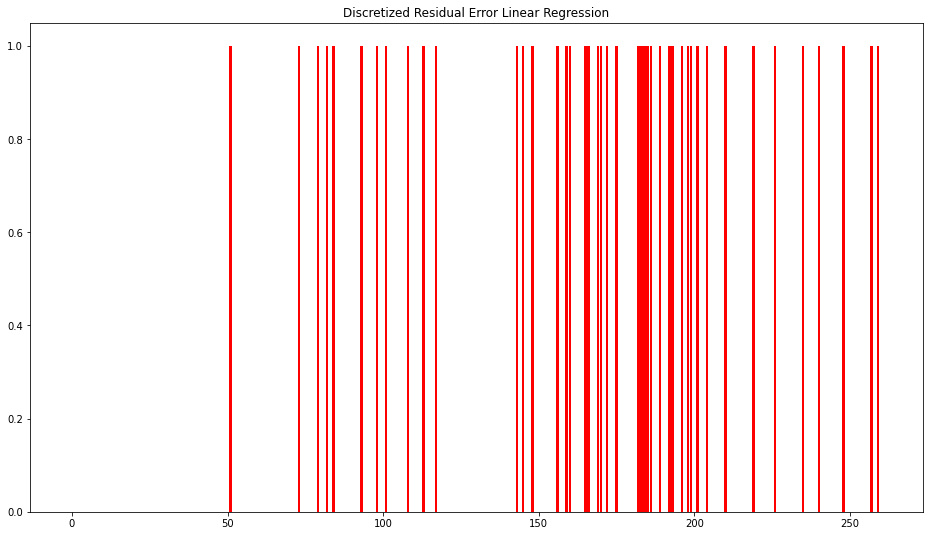

In [9]:
"""
LINEAR REGRESSION
"""
#
# predition[i] = sum_j(x[i][j]*theta[j]) + offset
# theta[j], offset are the parameters
# objective is to minimize sum_i((prediction[i]-actual[i])^2)
#

def gradient_descent_linear_regressor(data,theta,offset,learning_rate):
    dimension = data[0].__len__()-1
    
    gradient_theta = [0]*theta.__len__()
    gradient_offset = 0
    
    for row in data:
        prediction = 0
        for j in range(dimension):
             prediction += row[j]*theta[j]
        prediction += offset
        deviation = (prediction - row[dimension])
        
        for j in range(dimension):
            gradient_theta[j] += 2*deviation*row[j]
        
        gradient_offset += 2*deviation
    
    for j in range(dimension):
        theta[j] -= gradient_theta[j]*learning_rate
    
    offset -= gradient_offset*learning_rate
    
    return theta, offset
            
        
def linear_regressor(data,learning_rate = 0.001,iterations = 1000):
    theta = [0]*(data[0].__len__()-1)
    offset = 0
    
    for itr in range(iterations):
        theta, offset = gradient_descent_linear_regressor(data,theta,offset,learning_rate)

    return theta,offset


theta,offset = linear_regressor(data,0.0001,200)


comparer = []
residual_error = []

total = 0
correct = 0

reserr = []

for x in data:
    guess = predict_regressor(x,theta,offset)
    comparer += [[x[-1],guess]]
    residual_error += [(x[-1]-guess)*(x[-1]-guess)]
    reserr += [residual_regressor(x,theta,offset)]
    total += 1
    if(guess == x[-1]):
        correct += 1

error_dict["LinREG"] = reserr.copy()

print("ACCURACY OF LINEAR REGRESSION = " + str(correct*100/total) + " %")

table_pred = pd.DataFrame(comparer,columns = ['Actual','Prediction'])
display(table_pred)

plt.figure(figsize=(16,9))
plt.bar(list(range(data.__len__())),residual_error,color='r')
plt.title("Discretized Residual Error Linear Regression")
plt.show()



ACCURACY OF LASSO REGRESSION = 79.69348659003832 %


,Actual,Prediction
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
256,1.0,1
257,1.0,0
258,1.0,1
259,1.0,0


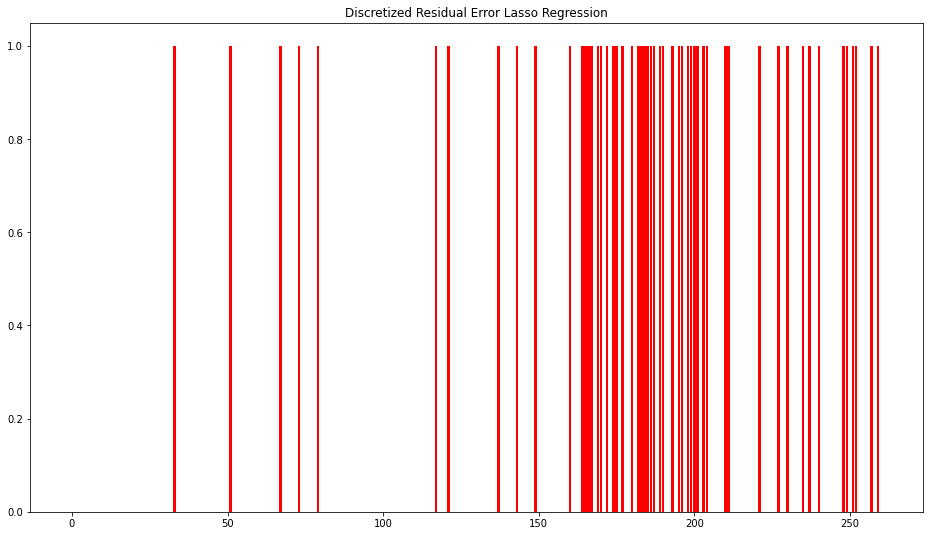

In [10]:
"""
LASSO REGRESSION
"""
#
# predition[i] = sum_j(x[i][j]*theta[j]) + offset
# theta[j], offset are the parameters
# objective is to minimize sum_i((prediction[i]-actual[i])^2)/(2*data.__len__()) + lambda*sum_j(|theta[j]|)
#

def gradient_descent_lasso_regressor(data,theta,offset,lambda_,learning_rate):
    dimension = data[0].__len__()-1
    
    gradient_theta = [0]*theta.__len__()
    gradient_offset = 0
    
    for row in data:
        prediction = 0
        for j in range(dimension):
             prediction += row[j]*theta[j]
        prediction += offset
        deviation = (prediction - row[dimension])
        
        for j in range(dimension):
            gradient_theta[j] += deviation*row[j]
            if(theta[j]>=0):
                gradient_theta[j] += lambda_*data.__len__()
            else:
                gradient_theta[j] -= lambda_*data.__len__()
        
        gradient_offset += deviation
    
    
    
    for j in range(dimension):

        theta[j] -= gradient_theta[j]*learning_rate/data.__len__()
    
    offset -= gradient_offset*learning_rate/data.__len__()
    
    return theta, offset
            
        
def lasso_regressor(data,lambda_ = 100,learning_rate = 0.001,iterations = 1000):
    theta = [0]*(data[0].__len__()-1)
    offset = 0
    
    for itr in range(iterations):
        theta, offset = gradient_descent_lasso_regressor(data,theta,offset,lambda_,learning_rate)

    return theta,offset



theta,offset = lasso_regressor(data,100,0.0001,200)


comparer = []
residual_error = []
reserr = []

total = 0
correct = 0
for x in data:
    guess = predict_regressor(x,theta,offset)
    comparer += [[x[-1],guess]]
    residual_error += [(x[-1]-guess)*(x[-1]-guess)]
    reserr += [residual_regressor(x,theta,offset)]
    total += 1
    if(guess == x[-1]):
        correct += 1

error_dict["LasREG"] = reserr.copy()
print("ACCURACY OF LASSO REGRESSION = " + str(correct*100/total) + " %")

table_pred = pd.DataFrame(comparer,columns = ['Actual','Prediction'])
display(table_pred)

plt.figure(figsize=(16,9))
plt.bar(list(range(data.__len__())),residual_error,color='r')
plt.title("Discretized Residual Error Lasso Regression")
plt.show()

ACCURACY OF RIDGE REGRESSION = 80.07662835249042 %


,Actual,Prediction
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
256,1.0,1
257,1.0,0
258,1.0,1
259,1.0,0


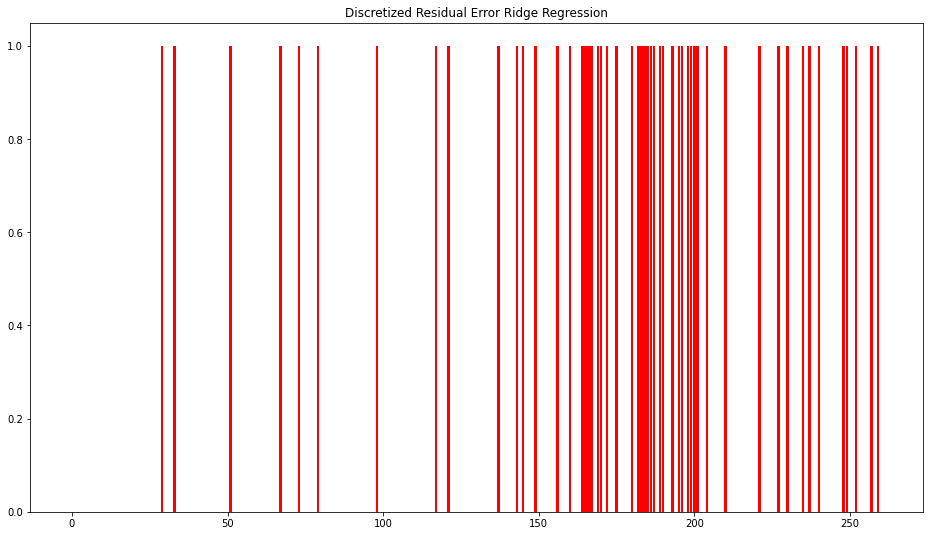

In [11]:
"""
RIDGE REGRESSION
"""
#
# predition[i] = sum_j(x[i][j]*theta[j]) + offset
# theta[j], offset are the parameters
# objective is to minimize sum_i((prediction[i]-actual[i])^2)(2*data.__len__()) + lambda*sum_j(theta[j]^2)
#

def gradient_descent_ridge_regressor(data,theta,offset,lambda_,learning_rate):
    dimension = data[0].__len__()-1
    
    gradient_theta = [0]*theta.__len__()
    gradient_offset = 0

    
    for row in data:
        prediction = 0
        for j in range(dimension):
             prediction += row[j]*theta[j]
        prediction += offset
        deviation = (prediction - row[dimension])
        
        for j in range(dimension):
            gradient_theta[j] += deviation*row[j]
            gradient_theta[j] += 2*lambda_*theta[j]*data.__len__()
        
        gradient_offset += deviation
    
    
    
    for j in range(dimension):
        theta[j] -= gradient_theta[j]*learning_rate/data.__len__()
    
    offset -= gradient_offset*learning_rate/data.__len__()
    
    return theta, offset
            
        
def ridge_regressor(data,lambda_ = 1,learning_rate = 0.001,iterations = 1000):
    theta = [0]*(data[0].__len__()-1)
    offset = 0
    
    for itr in range(iterations):
        theta, offset = gradient_descent_lasso_regressor(data,theta,offset,lambda_,learning_rate)

    return theta,offset


theta,offset = ridge_regressor(data,1,0.001,200)


comparer = []
residual_error = []
reserr = []

total = 0
correct = 0
for x in data:
    guess = predict_regressor(x,theta,offset)
    comparer += [[x[-1],guess]]
    residual_error += [(x[-1]-guess)*(x[-1]-guess)]
    reserr += [residual_regressor(x,theta,offset)]
    total += 1
    if(guess == x[-1]):
        correct += 1

error_dict["RidREG"] = reserr.copy()
        
print("ACCURACY OF RIDGE REGRESSION = " + str(correct*100/total) + " %")

table_pred = pd.DataFrame(comparer,columns = ['Actual','Prediction'])
display(table_pred)

plt.figure(figsize=(16,9))
plt.bar(list(range(data.__len__())),residual_error,color='r')
plt.title("Discretized Residual Error Ridge Regression")
plt.show()

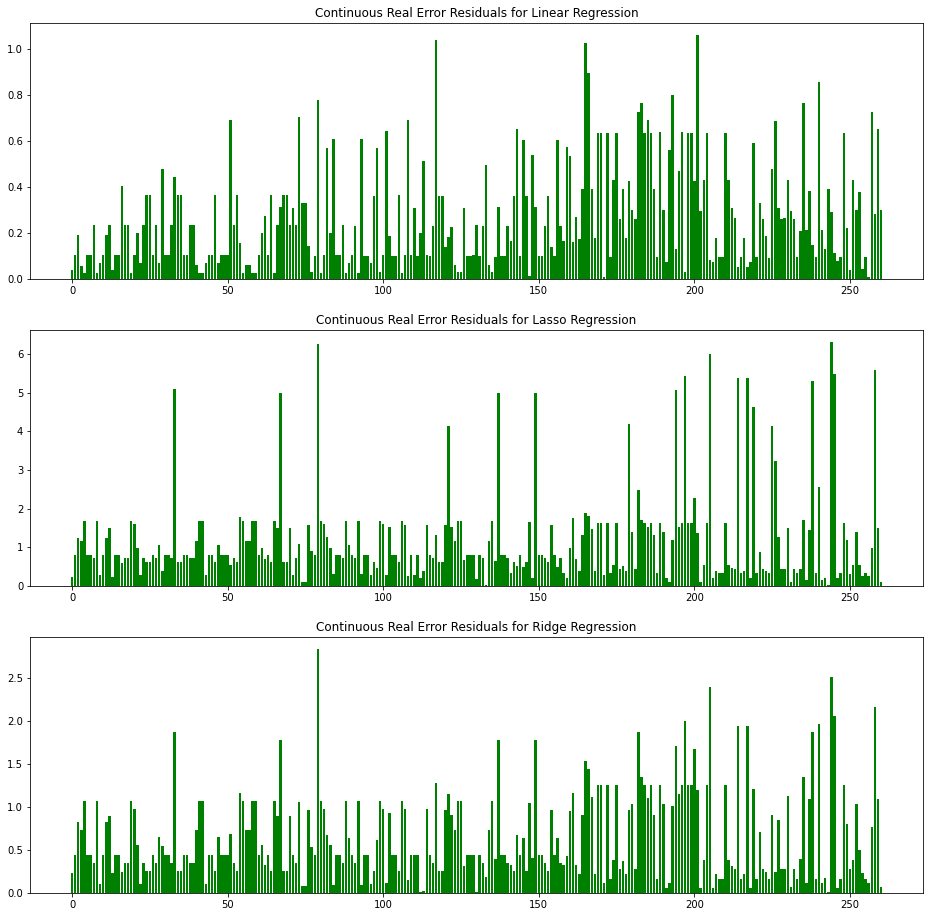

In [12]:
#
# Here we give the comparative analysis of the three models using
# their actual residuals instead of considering discrete 0, 1 residuals
#

plt.figure(figsize=(16,16))
titles = {"LinREG" : "Continuous Real Error Residuals for Linear Regression","LasREG" : "Continuous Real Error Residuals for Lasso Regression","RidREG" : "Continuous Real Error Residuals for Ridge Regression"}

count = 1
for model in error_dict:
    plt.subplot(3,1,count)
    plt.bar(list(range(data.__len__())),error_dict[model],color='g')
    plt.title(titles[model])
    count += 1

plt.show()